# Outliers 

An outlier is an observation in the data set that is distant from all other observations, therefore it is outside the general distribution of the dataset. 
They can occur for different reasons: 

Human errors 
Measurement errors 
Experimental errors 
Intentional to detect outliers
Data processing errors 
Data extraction errors
Natural outliers


In [ ]:
import numpy as np

import pandas as pd   
import matplotlib.pyplot as plt
from scipy import stats

price=np.array([80,71,79,61,78,73,77,74,76,75,160,79,80,78,75,78,86,80,75,82,69,100,72,74,75,180,72,71,120])
price_df=pd.DataFrame(price)
price_df.columns=['price']

**Outlier Identification**

There can be many reasons for the presence of outliers in the data. Sometimes the outliers may be genuine, while in other cases, they could exist because of data entry errors. It is important to understand the reasons for the outliers before cleaning them.

We will start the process of finding outliers by running the summary statistics on the variables. This is done using the describe() function below, which provides a statistical summary of all the quantitative variables.

In [ ]:
price_df.describe()

,price
count,29.000000
mean,84.482759
std,25.973366
min,61.000000
25%,74.000000
50%,77.000000
75%,80.000000
max,180.000000


**Identifying Outliers with Skewness**

Several machine learning algorithms make the assumption that the data follow a normal (or Gaussian) distribution. This is easy to check with the skewness value, which explains the extent to which the data is normally distributed. Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.


In [ ]:
print(price_df['price'].skew())
price_df['price'].describe()

-0.23807135789871647


count    29.000000
mean     76.310345
std       2.817084
min      71.000000
25%      75.000000
50%      77.000000
75%      78.000000
max      82.000000
Name: price, dtype: float64

**Identifying Outliers with Visualization**

In the previous section, we used quantitative methods for outlier identification. This can also be achieved with visualization. Some of the common plots used for outlier detection are discussed below.

1. Box Plot

The box plot is a standardized way of displaying the distribution of data based on the five-number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). It is often used to identify data distribution and detect outliers. 

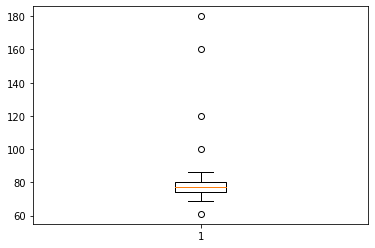

In [ ]:
plt.boxplot(price_df["price"])
plt.show()

2. Histogram

A histogram is used to visualize the distribution of a numerical variable. An outlier will appear outside the overall pattern of distribution. 

(array([ 6., 18.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.]),
 array([ 61. ,  72.9,  84.8,  96.7, 108.6, 120.5, 132.4, 144.3, 156.2,
        168.1, 180. ]),
 <a list of 10 Patch objects>)

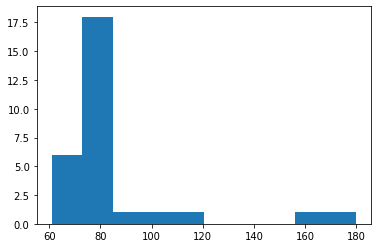

In [ ]:
plt.hist(price_df["price"])

**Identifying Outliers with Interquartile Range (IQR)**
The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The lines of code below calculate and print the interquartile range for each of the variables in the dataset.

In [ ]:
Q1=price_df.quantile(0.25)
Q3=price_df.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
print(lowqe_bound,upper_bound)

price    65.0
dtype: float64 price    89.0
dtype: float64


In [ ]:
price_df.shape

(29, 1)

In [ ]:
price_df[~((price_df < lowqe_bound) |(price_df > upper_bound)).any(axis=1)].shape

(24, 1)

# Exercises 

## Exercise 1


-a. Quantile-based Flooring and Capping: In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 90th percentile) for the higher values. Apply this approach to the previous dataset

-b. Trimming: In this method, we completely remove data points that are outliers by the filters you consider

-c. Log Transformation: Apply log transformation to this dataset and represent a histogram to see the shape of the distribution

-d. Replacing Outliers with Median values 



71.0
103.99999999999999


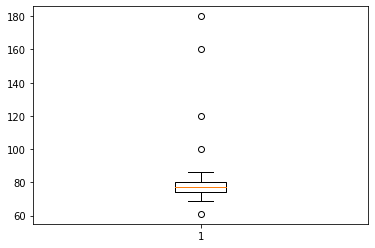

skew antes: 2.879976198725263
skew despues: 1.6981934852162943


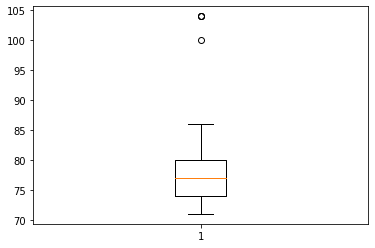

In [ ]:
#Answer here
#A
print(price_df['price'].quantile(0.10))
print(price_df['price'].quantile(0.90))
plt.boxplot(price_df["price"])
plt.show()
#En este scenario calculamos los valores que estan en los extremos y luego los remplazamos en el data set
print('skew antes:',price_df['price'].skew())
#Podemos observar como Skew se aproxima mas al valor deseado
price_df['price'] = np.where(price_df['price'] <71.0, 71.0,price_df['price'])
price_df['price'] = np.where(price_df['price'] >104.0, 104.0,price_df['price'])
print('skew despues:',price_df['price'].skew())
plt.boxplot(price_df["price"])
plt.show()


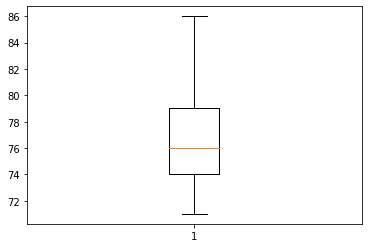

0.532736268156429


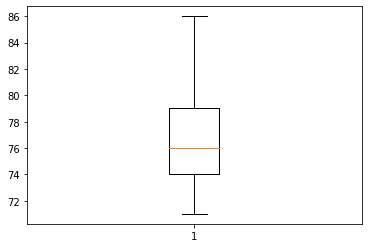

In [ ]:
#Answer here
#B
#En esta forma elegi,os arbitrariamente los numeros aue eliminaremos del set
plt.boxplot(price_df["price"])
plt.show()
#Como no tenemos mayor informacion de la data, podriamos mirar en boxplot los 
#elementos que podriamos considerar outliers and remove them from the set
index = price_df[(price_df['price'] >= 90)|(price_df['price'] <= 70)].index
price_df.drop(index, inplace=True)
#Vemos como skew mejora al igual que la grafica de boxplot
print('skew despues:',price_df['price'].skew())
plt.boxplot(price_df["price"])
plt.show()


skew antes: 2.879976198725263
skew despues: 2.4169251427813068


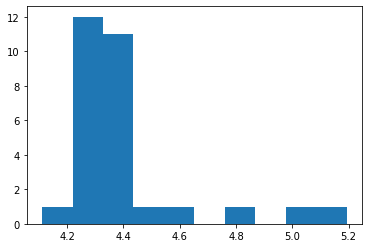

In [ ]:
#Answer here
#C
print('skew antes:',price_df['price'].skew())
#Podemos observar como Skew se aproxima mas al valor deseado
price_df['price'] = price_df['price'].map(lambda i: np.log(i) if i > 0 else 0) 
plt.hist(price_df['price'])
print('skew despues:',price_df['price'].skew())
#En este caso la mejora no es muy significativa, pero podemos ver una leve mejora


            price
count   29.000000
mean    84.482759
std     25.973366
min     61.000000
25%     74.000000
50%     77.000000
75%     80.000000
max    180.000000
85.20000000000002
72.0


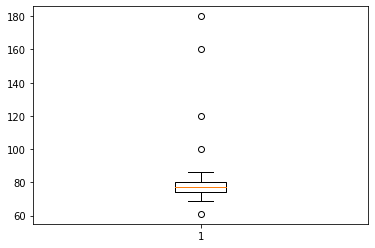

skew antes: 2.879976198725263
skew despues: -0.11459162906903701


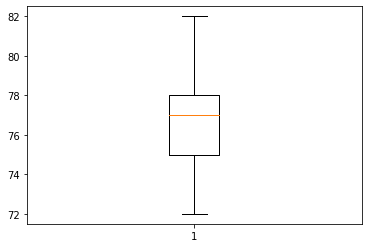

           price
count  29.000000
mean   76.724138
std     2.403815
min    72.000000
25%    75.000000
50%    77.000000
75%    78.000000
max    82.000000


In [ ]:
#Answer here
#D
print(price_df.describe()) 
#Podemos ver que la media es 77, remplazaremos los outliers con este valor
print(price_df['price'].quantile(0.85)) 
print(price_df['price'].quantile(0.15)) 
plt.boxplot(price_df["price"])
plt.show()
# Podemos variar el rango a seleccionar en este caso 
print('skew antes:',price_df['price'].skew())
#Podemos observar como Skew se aproxima mas al valor deseado
price_df['price'] = np.where(price_df['price'] <72.0, 77.0,price_df['price'])
price_df['price'] = np.where(price_df['price'] >85.0, 77.0,price_df['price'])
print('skew despues:',price_df['price'].skew())

#Hemos eliminado los outliers 
plt.boxplot(price_df["price"])
plt.show()
print(price_df.describe()) 